In [1]:
%matplotlib notebook

In [2]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matminer.featurizers.structure import XRDPowderPattern
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
arr = r'C:\Python\Projects\crystal-phase-prediction\pkl_files\xray_hfo2.pkl'

df = pd.read_pickle(arr)
X = df
X

,0,1,2,3,4,5,6,7,8,9,...,15990,15991,15992,15993,15994,15995,15996,15997,15998,15999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009087,0.009169,0.009141,0.009002,0.008755,0.008406,0.007968,0.007455,0.006883,0.006272
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000602,0.000564,0.000526,0.000489,0.000452,0.000415,0.000379,0.000343,0.000309,0.000275
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001845,0.001771,0.001687,0.001595,0.001494,0.001387,0.001275,0.001161,0.001045,0.000932
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001303,0.001276,0.001242,0.001200,0.001150,0.001093,0.001030,0.000960,0.000886,0.000809
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010301,0.009738,0.009114,0.008445,0.007745,0.007029,0.006312,0.005608,0.004930,0.004286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.001256,0.001210,0.001158,0.001098,0.001031,0.000957,0.000878,0.000796,0.000713,0.000631
1721,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004687,0.004424,0.004182,0.003954,0.003733,0.003514,0.003294,0.003068,0.002837,0.002602
1722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.017270,0.016421,0.015491,0.014497,0.013457,0.012389,0.011310,0.010238,0.009189,0.008176
1723,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004580,0.004893,0.005178,0.005421,0.005612,0.005742,0.005804,0.005794,0.005711,0.005557


In [28]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true

0             m
1             o
2           p-o
3             t
4             m
         ...   
1720          t
1721          m
1722          o
1723    unknown
1724          t
Name: labels_0_4, Length: 1725, dtype: object

In [ ]:
# labels_true = labels_true['new_labels']
# labels_true = labels_true.values
# labels_true = labels_true.astype(int)

In [ ]:
labels_true = labels_true.replace({'m': 0, 'p-o': 1, 'o': 2, 't': 3, 'unknown': 4})
labels_true

In [31]:
# not good
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(df)
X

array([[0.        , 0.        , 0.        , ..., 0.194572  , 0.19158213,
        0.18724877],
       [0.        , 0.        , 0.        , ..., 0.00895625, 0.00858968,
        0.00822203],
       [0.        , 0.        , 0.        , ..., 0.03029444, 0.02909773,
        0.0278139 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.2672208 , 0.25575187,
        0.24409062],
       [0.        , 0.        , 0.        , ..., 0.15122333, 0.15894959,
        0.16591087],
       [0.        , 0.        , 0.        , ..., 0.02078907, 0.01985251,
        0.01882683]])

In [ ]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

In [ ]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [30]:
mPCA = PCA(n_components=100)
PrincipleComponents = mPCA.fit_transform(X)
variance = mPCA.explained_variance_ratio_
variance_ratio = np.cumsum(np.round(variance, decimals=3)*100)
variance_ratio

array([13.6, 18.6, 22.8, 25.2, 27. , 28.6, 30.1, 31.5, 32.8, 33.9, 34.9,
       35.9, 36.8, 37.7, 38.6, 39.4, 40.2, 41. , 41.7, 42.4, 43.1, 43.8,
       44.4, 45. , 45.6, 46.2, 46.8, 47.4, 48. , 48.5, 49. , 49.5, 50. ,
       50.5, 51. , 51.5, 52. , 52.5, 53. , 53.4, 53.8, 54.2, 54.6, 55. ,
       55.4, 55.8, 56.2, 56.6, 57. , 57.4, 57.8, 58.2, 58.6, 59. , 59.3,
       59.6, 59.9, 60.2, 60.5, 60.8, 61.1, 61.4, 61.7, 62. , 62.3, 62.6,
       62.9, 63.2, 63.5, 63.8, 64.1, 64.4, 64.7, 65. , 65.3, 65.6, 65.9,
       66.2, 66.5, 66.8, 67.1, 67.4, 67.6, 67.8, 68. , 68.2, 68.4, 68.6,
       68.8, 69. , 69.2, 69.4, 69.6, 69.8, 70. , 70.2, 70.4, 70.6, 70.8,
       71. ])

<IPython.core.display.Javascript object>


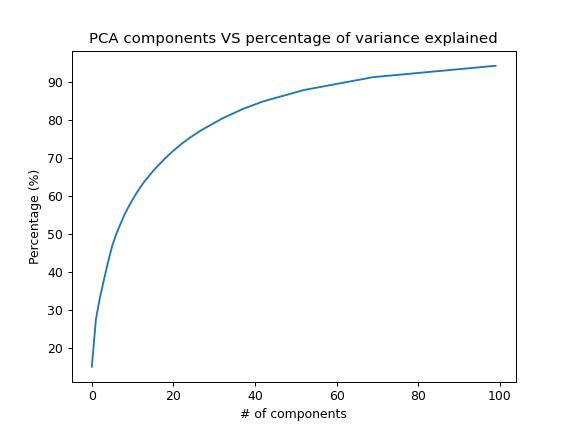

In [6]:
plt.title("PCA components VS percentage of variance explained")
plt.ylabel("Percentage (%)")
plt.xlabel("# of components")
plt.plot(variance_ratio)
plt.show()

In [ ]:
pca = PCA(n_components=50)
PCA = pca.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=5)
PCA_labels = kmeans.fit_predict(PCA)

In [ ]:
from sklearn import metrics
metrics.silhouette_score(PCA, PCA_labels, metric='l2')

In [ ]:
dfPCA = pd.DataFrame(PCA)
dfPCA['cluster'] = PCA_labels
dfPCA['labels'] = labels_true
# dfPCA.columns = ['x1','x2','x3','x4','x5','cluster', 'labels']


In [ ]:
dfPCA.head(50)

In [ ]:
# look at the above table
dfPCA = dfPCA.replace({'m': 4, 'p-o': 1, 'o': 2, 't': 0, 'unknown': 1})

In [ ]:
dfPCA2 = dfPCA[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=dfPCA2, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Predicted Clusters with 80% representation", fontsize=10)

In [ ]:
dfPCA2_true = dfPCA[['x1', 'x2', 'labels']]
lm = sns.lmplot(data=dfPCA2_true, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D PCA Ground Truth with 80% representation", fontsize=10)

In [ ]:

dfPCA['labels'] = dfPCA['labels'].replace({0: 'm', 1:'p-o', 2:'o', 3: 't', 4: 'unknown'})
dfPCA

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [ ]:
fig = px.scatter_3d(
    dfPCA, x='x1', y='x2', z='x3', color=dfPCA['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()

In [ ]:
from sklearn.cluster import OPTICS
X_optics = dfPCA[['x1', 'x2', 'x3']]

# min_samples = list(range(50, 60))
# for i in min_samples:
    # print('min_samples is: ' + str(i))
    
clustering = OPTICS(min_samples=120).fit(X_optics)
labels_optics = clustering.labels_
dfPCA['labels_optics'] = labels_optics
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels_optics)) - (1 if -1 in labels_optics else 0)
n_noise_ = list(labels_optics).count(-1)
unique, counts = np.unique(labels_optics, return_counts=True)
print(dict(zip(unique, counts)))
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X_optics, labels_optics))


In [ ]:
dfPCA_optics = dfPCA[['x1', 'x2', 'x3','labels_optics']]

fig = px.scatter_3d(
    dfPCA_optics, x='x1', y='x2', z='x3', color=dfPCA_optics['labels_optics'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction OPTICS'
)
fig.show()

In [ ]:
# Test 

In [19]:
from sklearn.decomposition import NMF

model = NMF(n_components=4, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [20]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2,3
0,0.000000,0.000368,0.000000,0.451064
1,0.000000,0.039055,0.504851,0.037736
2,0.000000,0.562099,0.020308,0.032525
3,0.009449,0.503092,0.000000,0.001301
4,0.053561,0.018225,0.000000,0.374344
...,...,...,...,...
1720,0.077140,0.199267,0.000000,0.000000
1721,0.269924,0.000000,0.020755,0.397891
1722,0.227546,0.081308,0.519088,0.019082
1723,0.238927,0.274557,0.036435,0.000000


In [21]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [24]:
from sklearn import metrics
metrics.silhouette_score(W_df, nmf_labels, metric='l1')

0.5036310489598679

In [25]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','cluster', 'labels']
W_df.head(40)

,x1,x2,x3,x4,cluster,labels
0,0.000000,0.000368,0.000000,0.451064,3,m
1,0.000000,0.039055,0.504851,0.037736,0,o
2,0.000000,0.562099,0.020308,0.032525,1,p-o
3,0.009449,0.503092,0.000000,0.001301,1,t
4,0.053561,0.018225,0.000000,0.374344,3,m
5,0.064420,0.453605,0.042255,0.026890,1,p-o
6,0.438608,0.107208,0.000000,0.000000,2,unknown
7,0.000000,0.014050,0.016718,0.619046,3,m
8,0.052922,0.082301,0.470796,0.068119,0,o
9,0.061880,0.465131,0.039190,0.035193,1,p-o


In [ ]:
W_df = W_df.replace({'m': 3, 'p-o': 1, 'o': 0, 't': 1, 'unknown': 4})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

In [26]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [27]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [ ]:
from sklearn.manifold import TSNE

Xtsne = TSNE(n_components=3).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)

dftsne['labels'] = labels_true
#dftsne.columns = ['x1','x2', 'x3','cluster', 'labels']
dftsne

In [ ]:
kmeans = KMeans(n_clusters=5)
tsne_labels = kmeans.fit_predict(dftsne[[0, 1, 2]])
dftsne['cluster'] = tsne_labels
dftsne.columns = ['x1','x2','x3','labels', 'cluster']

In [ ]:
import plotly.express as px
fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [ ]:
import plotly.express as px
dftsne3D = dftsne[['x1', 'x2', 'x3' ,'cluster']]

fig = px.scatter_3d(
    dftsne, x='x1', y='x2', z='x3', color=dftsne['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='TSNE 3D Prediction Kmeans'
)
fig.show()

In [ ]:
dftsne.head(40)

In [ ]:
dftsne = dftsne.replace({'m': 3, 'p-o': 2, 'o': 0, 't': 4, 'unknown': 1})

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(dftsne['labels'], dftsne['cluster'])